#Market Segmentation Analysis

# step 4: Exploring Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale, LabelEncoder # Import scale

In [ ]:
df=pd.read_csv('/content/mcdonalds.csv')

In [ ]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
df.keys()

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
df.shape

(1453, 15)

In [ ]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [ ]:
df1 = df.iloc[:, 0:11]

#Convert "Yes" to 1 and other values to 0
df1 = (df1 == "Yes").astype(int)

#Calculate the column means
column_means = np.mean(df1, axis=0)

#Round the column means to 2 decimal places
rounded_means = np.round(column_means, 2)
print(rounded_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


The round_() function in NumPy rounds the elements of an array to a specified number of decimal places. This function is extremely useful when working with floating-point numbers and when precision is important in scientific computing or data analysis.

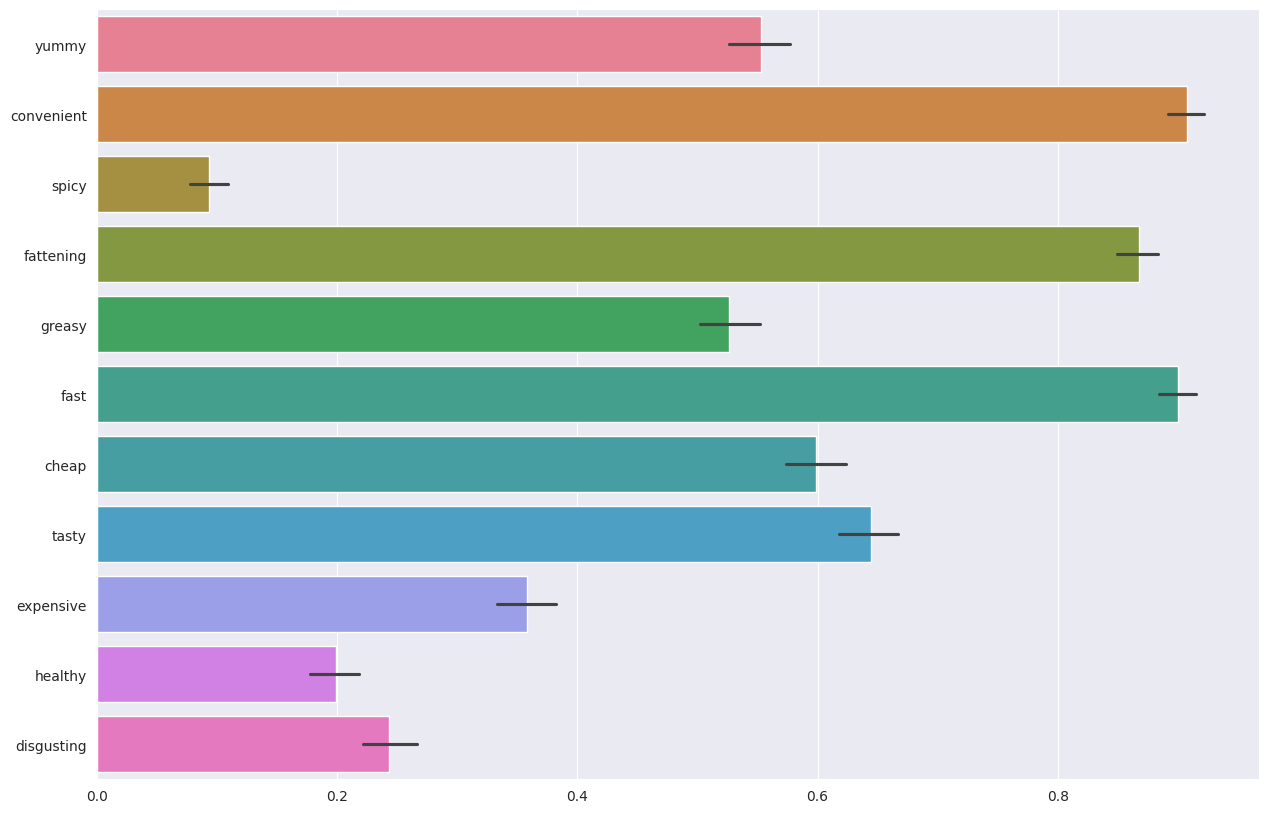

In [ ]:
sns.set({'figure.figsize':(15,10)})
sns.barplot(data = df1,orient='h')
plt.show()

In [ ]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
# drop not useful columns
df = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

KeyError: "['Like', 'Age', 'VisitFrequency', 'Gender'] not found in axis"

In [ ]:
#label encoding for data convertion to binary


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Columns to encode
encoded = ['yummy', 'convenient', 'spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']

# Apply label encoding using a loop
for column in encoded:
    df[column] = le.fit_transform(df[column])


In [ ]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
from sklearn.decomposition import PCA
pca_data = scale(df)
pca = PCA(n_components=11)

pc = pca.fit_transform(pca_data)
names = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_
components = pca.components_

print("Standard deviation:\n", singular_values)
print("Proportion of Variance:\n", explained_variance_ratio)
print("Cumulative Proportion:\n", explained_variance_ratio.cumsum())

Standard deviation:
 [63.91179298 48.69332668 44.78138456 39.63136078 36.52831435 33.7082743
 32.22832023 29.33600188 27.59057302 21.14107869 19.31862906]
Proportion of Variance:
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Proportion:
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


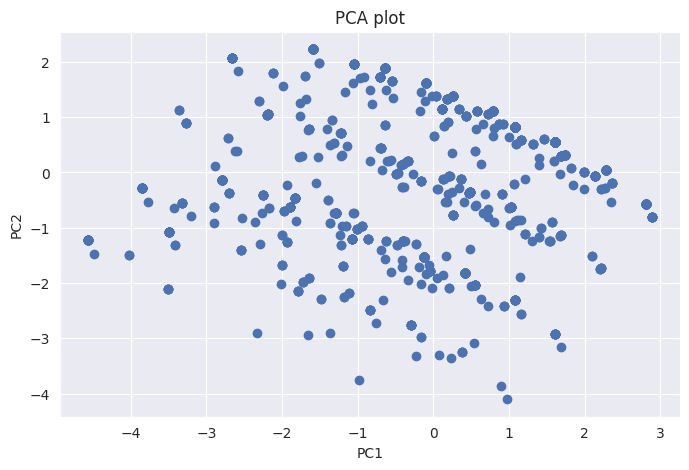

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(data=pf,x='pca1',y='pca2', cmap='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()




In [ ]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(pf)

#Perform PCA on the Preprocessed Dataset


In [ ]:
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)

array([[ 1.05169904, -1.78812734, -0.52595778],
       [ 1.07244408,  0.54759844, -0.93993766],
       [ 1.99359858,  0.49266673,  1.99099191],
       ...,
       [-1.01329518, -0.64951977,  0.78977594],
       [-0.09135563,  0.93041317, -1.66076737],
       [ 1.18102795, -0.52442106, -0.32309549]])

In [ ]:
print(pca.components_)

[[ 0.07048851  0.10994404  0.14570756  0.17274997 -0.03181822 -0.16656586
   0.76073903 -0.05842068 -0.45731531  0.12126997  0.31166216]
 [-0.0996817  -0.08060433  0.08724327  0.23722656 -0.2296504   0.78734797
   0.05374451 -0.46318567 -0.10376707  0.06640982 -0.12006344]
 [-0.30164824 -0.20714496  0.41114825 -0.0854669   0.23005845  0.15830149
  -0.0026344   0.50578164 -0.40219365  0.10928072 -0.42689761]]


In [ ]:
print(sum(pca.explained_variance_ratio_))

0.2727272727272742


In [ ]:
nums = np.arange(1,12)

In [ ]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

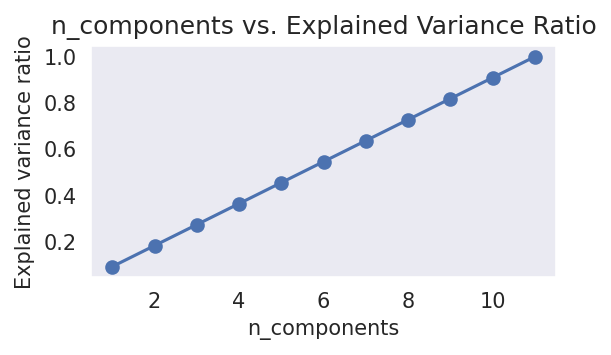

In [ ]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [ ]:
import plotly.express as px

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
X = df[features]
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

In [ ]:
comp = pca.components_.T
comp

array([[ 7.04885139e-02, -9.96816982e-02, -3.01648243e-01,
        -9.34866527e-03, -3.79661096e-01, -5.50126443e-02,
         8.52388673e-01,  1.05102347e-01,  9.12725824e-02,
        -2.97927001e-02,  3.96064181e-03],
       [ 1.09944040e-01, -8.06043312e-02, -2.07144963e-01,
         1.26224404e-01, -3.01626352e-01, -2.19524368e-01,
        -3.27592584e-01, -4.16809449e-03,  8.20593464e-01,
        -4.09839533e-02, -3.18844469e-02],
       [ 1.45707564e-01,  8.72432680e-02,  4.11148253e-01,
         2.45558717e-01, -2.63475321e-01,  6.78696858e-01,
         9.19321012e-02, -2.21059647e-01,  1.88111104e-01,
         3.31043251e-01, -9.73292292e-02],
       [ 1.72749966e-01,  2.37226557e-01, -8.54669029e-02,
         2.42578245e-01, -1.77234992e-01,  2.06178644e-01,
        -1.71870591e-01,  8.41929522e-01, -1.40914230e-01,
        -1.05622454e-01, -6.64273608e-02],
       [-3.18182218e-02, -2.29650404e-01,  2.30058447e-01,
        -1.77672004e-02,  5.63556036e-01, -1.17933172e-01,
  

In [ ]:
pc_labels = [f"PC{i}" for i in range(1, comp.shape[1] + 1)]
comp_df = pd.DataFrame(comp, columns=pc_labels, index=df.columns)
comp_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.070489,-0.099682,-0.301648,-0.009349,-0.379661,-0.055013,0.852389,0.105102,0.091273,-0.029793,0.003961
convenient,0.109944,-0.080604,-0.207145,0.126224,-0.301626,-0.219524,-0.327593,-0.004168,0.820593,-0.040984,-0.031884
spicy,0.145708,0.087243,0.411148,0.245559,-0.263475,0.678697,0.091932,-0.221060,0.188111,0.331043,-0.097329
fattening,0.172750,0.237227,-0.085467,0.242578,-0.177235,0.206179,-0.171871,0.841930,-0.140914,-0.105622,-0.066427
greasy,-0.031818,-0.229650,0.230058,-0.017767,0.563556,-0.117933,0.235354,0.373685,0.321369,0.399069,-0.322391
fast,-0.166566,0.787348,0.158301,0.211836,-0.064417,-0.437351,0.124678,-0.095158,0.020599,0.206891,-0.138391
cheap,0.760739,0.053745,-0.002634,0.397794,0.354778,-0.114172,0.114863,-0.194429,-0.025514,-0.261600,0.034004
tasty,-0.058421,-0.463186,0.505782,0.399047,-0.357686,-0.424805,-0.036053,0.063436,-0.229744,-0.000734,0.022073
expensive,-0.457315,-0.103767,-0.402194,0.703650,0.242060,0.154135,0.021872,-0.081701,-0.009856,0.076768,0.166486
healthy,0.121270,0.066410,0.109281,-0.083127,0.057048,-0.072061,0.034179,0.158957,0.098937,0.350679,0.891282


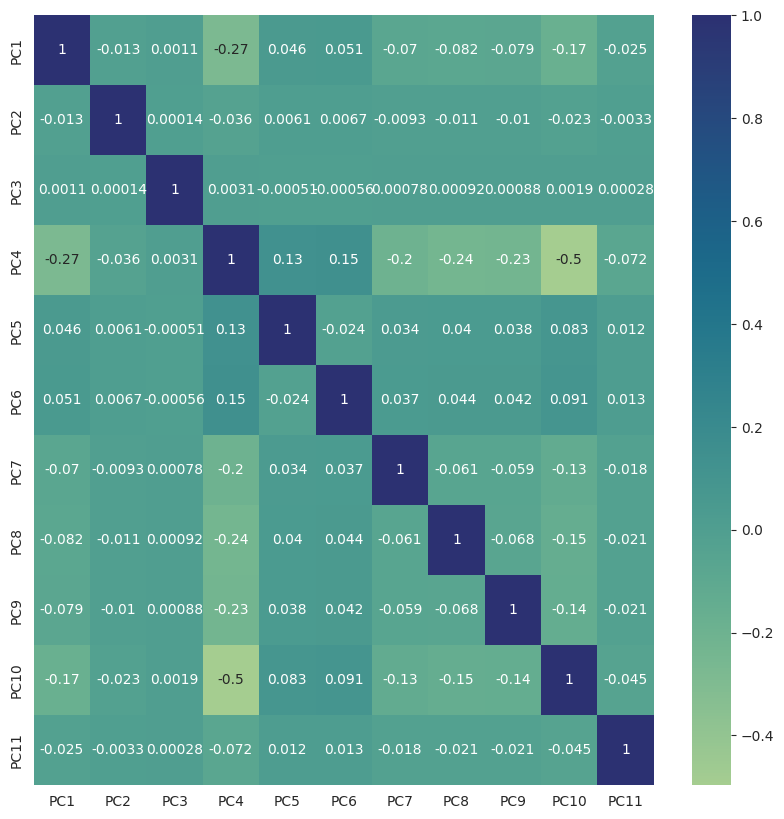

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(comp_df.corr(),annot=True,cmap='crest')
plt.show()

# Step 5: Extracting Segments

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import random

random.seed(1234)
print(random.random())

0.9664535356921388


Runs clustering algorithms repeatedly for different numbers of clusters and returns the minimum within cluster distance solution for each.

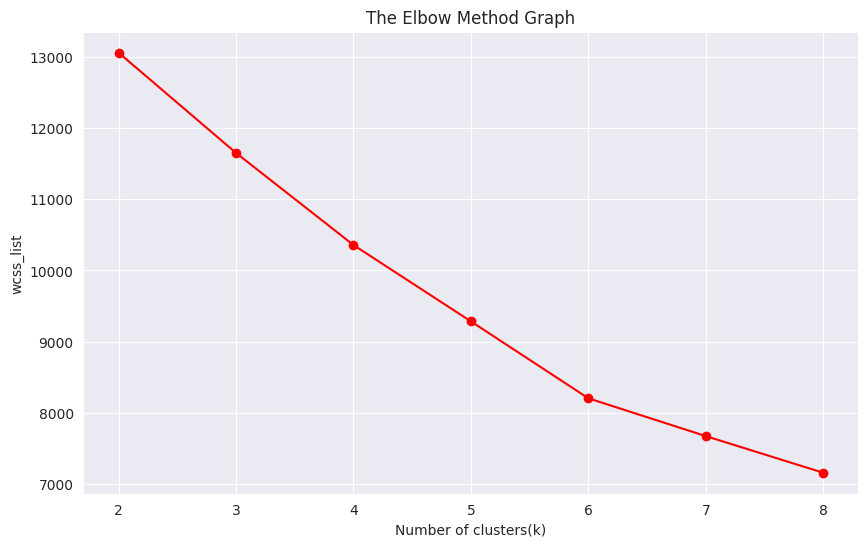

In [ ]:
import random
wcss_list=[]
cluster_labels = {}
plt.subplots(figsize=(10,6))
for i in range(2,9):    # extract between 2 and 8 segment so 2 to 9 is taken
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0,n_init=10)
  kmeans.fit(pf)
  wcss_list.append(kmeans.inertia_)
  cluster_labels[i]=kmeans.labels_ # Store labels with cluster number as key
plt.plot(range(2,9),wcss_list,marker='o',color='red')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
print('Cluster centroids: ', kmeans.cluster_centers_)
print ('Labels:', kmeans.labels_)
print('No. of iterations: ', kmeans.n_iter_)
print ('WCSS:', kmeans.inertia_)

Cluster centroids:  [[ 1.48706344e+00  3.52483975e-01  1.04503662e-01 -5.94943980e-01
  -1.22006729e-01 -2.65128650e-01 -3.19161605e-01  6.86137242e-01
   2.51469092e-01  6.69677431e-02 -6.89121659e-02]
 [-1.21958176e+00  1.06029409e+00 -8.91369620e-02 -2.95334904e-01
   8.53124070e-01  8.05605783e-02  5.05738650e-01  4.83913194e-02
  -5.77580325e-02 -2.17024910e-01  2.06836774e-02]
 [-2.65270264e+00 -1.20762532e+00 -1.06911519e+00 -3.18917851e-01
  -1.51354260e+00 -1.22018097e+00  6.89593200e-01  3.54776106e-02
   1.00386819e-01  2.63084114e-02 -1.06872490e-02]
 [-2.76634658e+00  3.58208798e-01 -9.09882436e-01  1.53446597e-01
  -7.01382560e-01  1.11527425e+00 -1.82024628e+00  3.67423939e-01
  -6.93456988e-01 -1.03188426e-03  4.98308318e-02]
 [ 1.86084308e+00 -7.17537047e-01 -2.08315718e+00 -3.69222229e-02
   2.84817883e-01  5.04171707e-01  8.89778350e-02 -9.86739449e-01
   1.85904316e-01 -4.85533948e-03  4.48543287e-02]
 [ 2.61740873e-01 -3.18439069e-01  2.09373567e-01  2.81699323e+00

In [ ]:
cluster_labels[i]=kmeans.labels_

In [ ]:
elbow_i = 2
elbow_cluster_labels = cluster_labels[elbow_i]
print(elbow_cluster_labels)

[0 1 1 ... 1 1 0]


In [ ]:
column_means = df.mean()
rounded_column_means = column_means.round(2)
print(rounded_column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


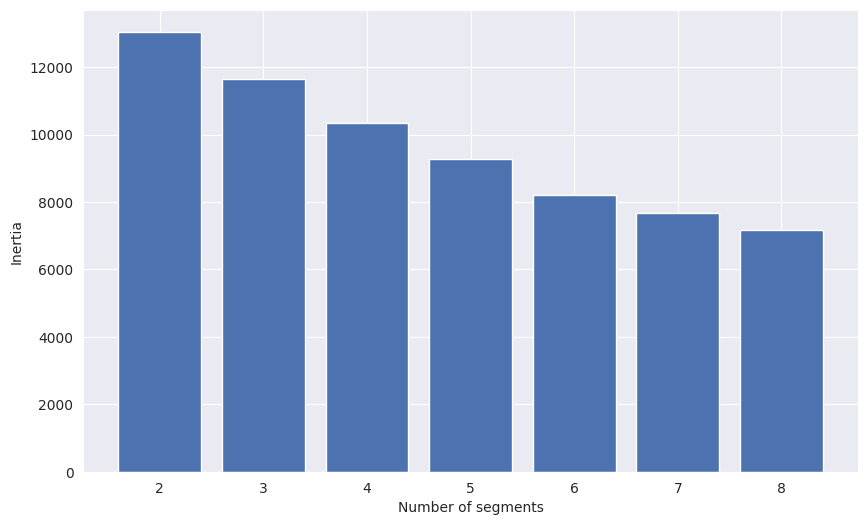

In [ ]:
plt.subplots(figsize=(10,6))
plt.bar(range(2,9),wcss_list)
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Function to compute global stability of k-means clustering using bootstrapping and ARI
def global_stability(data, cluster_range, nrep, nboot):
    stability_results = {n_clusters: [] for n_clusters in cluster_range}

    for n_clusters in cluster_range:
        for _ in range(nboot):
            # Bootstrap sample
            boot_sample = resample(data, n_samples=len(data), random_state=None)

            # Fit k-means to the initial bootstrap sample to get labels
            kmeans = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=None)
            kmeans.fit(boot_sample)
            labels = kmeans.labels_  # Cluster labels for the bootstrapped sample

            # Bootstrap a second sample for stability comparison
            boot_sample2 = resample(data, n_samples=len(data), random_state=None)
            kmeans2 = KMeans(n_clusters=n_clusters, n_init=nrep, random_state=None)
            kmeans2.fit(boot_sample2)
            labels2 = kmeans2.labels_

            # Adjusted Rand Index (ARI) to compare clustering results
            ari = adjusted_rand_score(labels, labels2)
            stability_results[n_clusters].append(ari)

    # Compute the mean ARI for each number of clusters
    mean_ari = {n_clusters: np.mean(ari_values) for n_clusters, ari_values in stability_results.items()}

    return mean_ari

# Define parameters
cluster_range = range(2, 9)  # Number of clusters to test (2 to 8)
nrep = 10  # Number of random initializations for k-means
nboot = 100  # Number of bootstrap samples

# Load your dataset here, e.g.:
# df1 = pd.read_csv('your_dataset.csv')  # Assuming you load data into df1

# Calculate global stability
mean_stability = global_stability(df1, cluster_range, nrep, nboot)

# Plotting the mean stability results
plt.figure(figsize=(8, 5))
plt.boxplot(list(mean_stability.keys()), list(mean_stability.values()), marker='o', color='b', linestyle='--')
plt.title('Global Stability of K-Means Segmentation')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

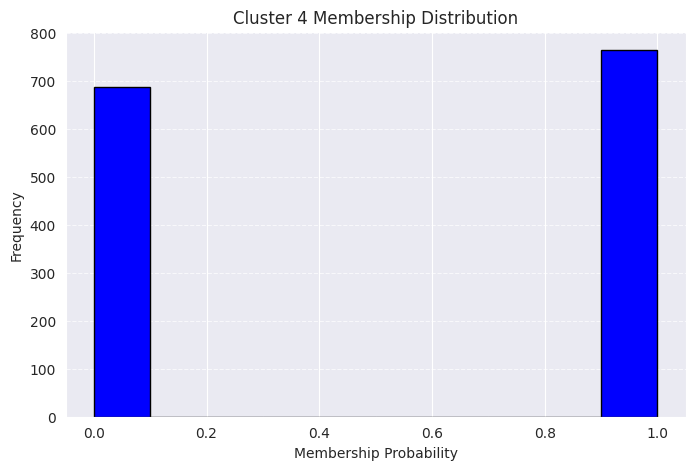

In [ ]:
pca_data = scaled_df
plt.figure(figsize=(8, 5))
plt.hist(df.iloc[:, 4], bins=10, range=(0, 1), color='blue', edgecolor='black')# Use array indexing to select all rows (:) and the 5th column (index 4)
plt.title('Cluster 4 Membership Distribution')
plt.xlabel('Membership Probability')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

               yummy  convenient     spicy  fattening    greasy      fast  \
yummy       1.000000    0.253807  0.008742  -0.087027 -0.151853  0.106836   
convenient  0.253807    1.000000  0.028928   0.036451 -0.106948  0.243062   
spicy       0.008742    0.028928  1.000000  -0.041322  0.053932  0.020276   
fattening  -0.087027    0.036451 -0.041322   1.000000  0.319283  0.045600   
greasy     -0.151853   -0.106948  0.053932   0.319283  1.000000 -0.058212   
fast        0.106836    0.243062  0.020276   0.045600 -0.058212  1.000000   
cheap       0.105036    0.151574  0.017203  -0.026640 -0.073264  0.252133   
tasty       0.687280    0.289755  0.061154  -0.087561 -0.163536  0.145836   
expensive  -0.061727   -0.163961  0.045979   0.089134  0.147283 -0.201694   
healthy     0.247183    0.099230  0.106252  -0.338401 -0.211186  0.033596   
disgusting -0.419852   -0.340797  0.032834   0.146054  0.321879 -0.137993   

               cheap     tasty  expensive   healthy  disgusting  
yummy    

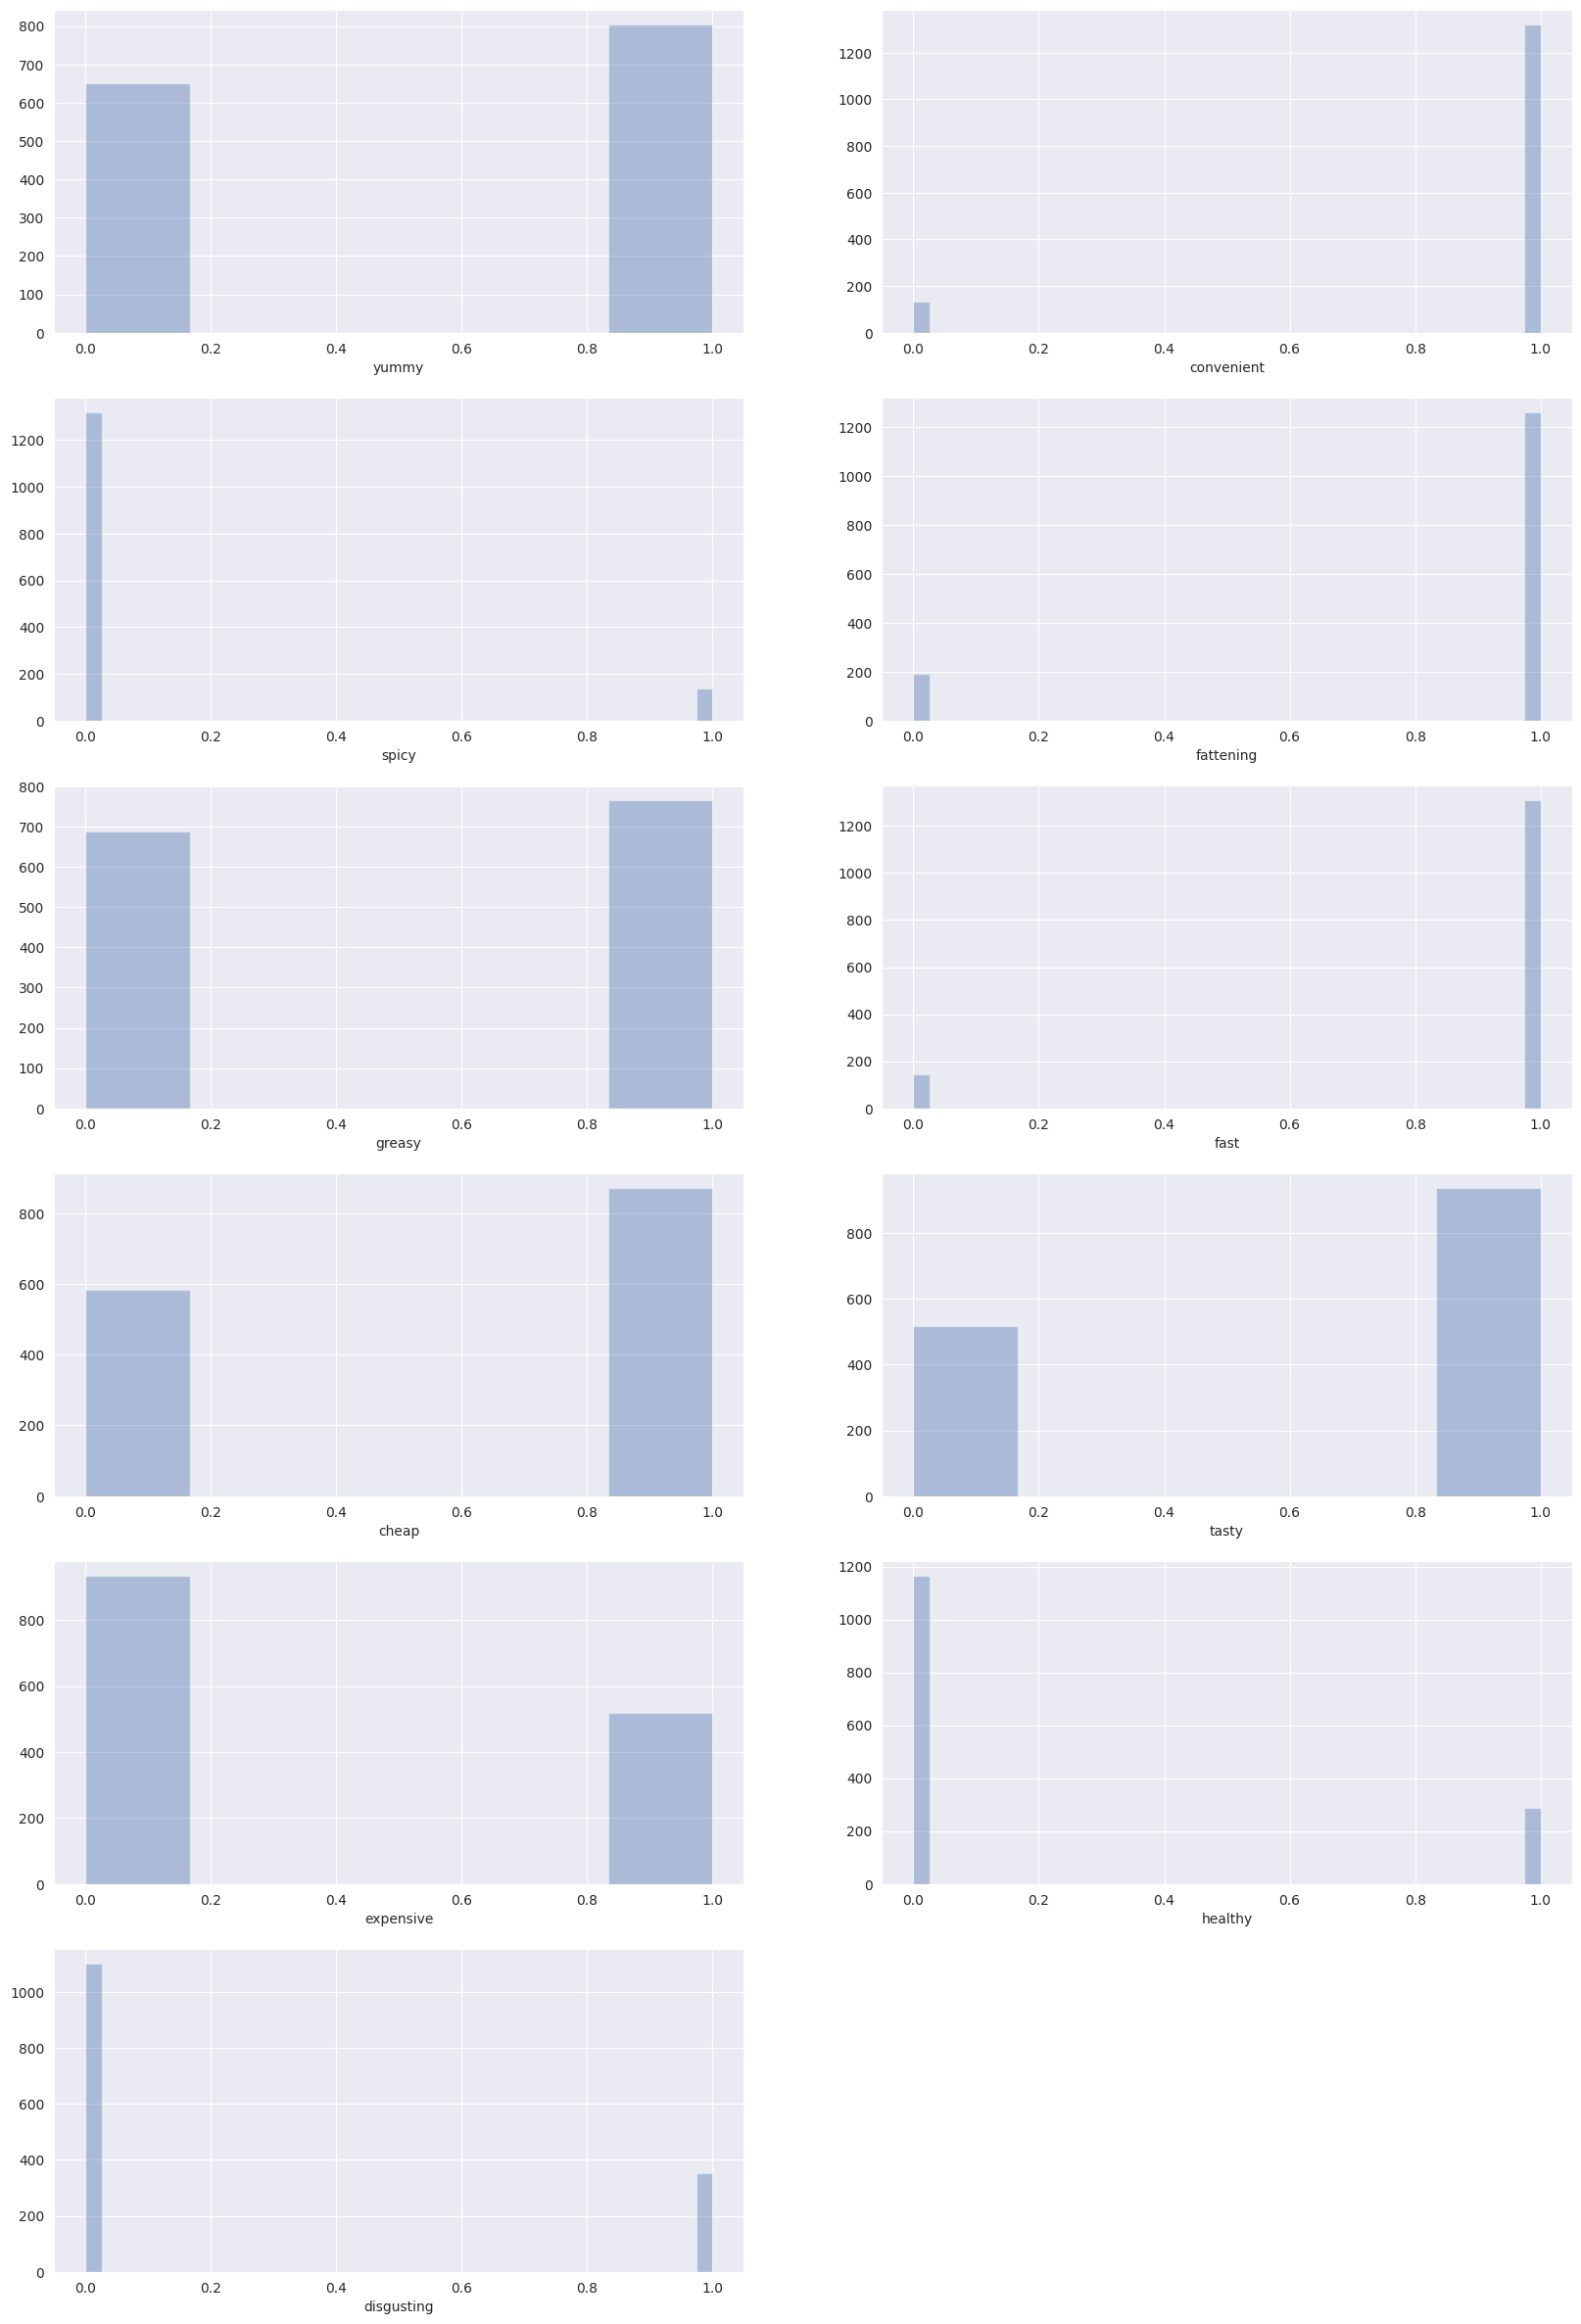

In [ ]:

def display(data, figuresize):
    category = []
    conv = []
    u = int((df1.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1
    for i in df1.columns:
        if df1[i].dtypes == "object":
            category.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=df, x=i)
        else:
            conv.append(i)
    for i in conv:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(df1[i].dropna(), kde=False)
    print(df1[conv].corr())
display(df1, (20, 30))

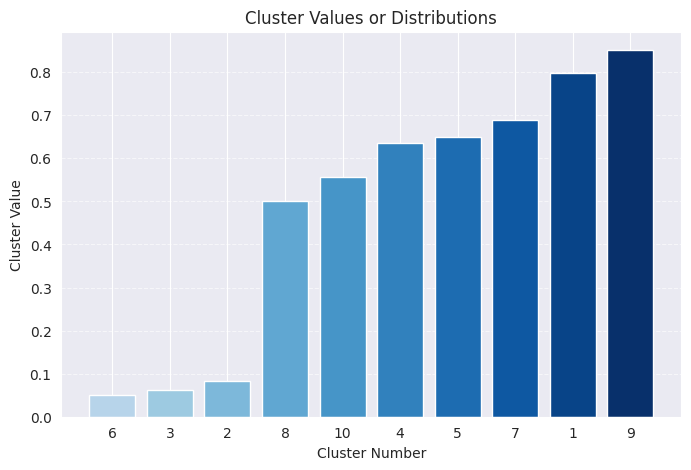

In [ ]:
k4 = np.random.rand(10)  # Random values for illustration
vclust_order = np.argsort(k4)  # Example of clustering order, replace with actual order

plt.figure(figsize=(8, 5))
bars = plt.bar(np.arange(len(k4)), k4[vclust_order], color=plt.cm.Blues(np.linspace(0.3, 1, len(k4))))

plt.title('Cluster Values or Distributions')
plt.xlabel('Cluster Number')
plt.ylabel('Cluster Value')
plt.xticks(np.arange(len(k4)), labels=vclust_order + 1)  # Show cluster numbers on x-axis
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.show()


In [ ]:
original_df = pd.read_csv('/content/mcdonalds.csv')
gender_counts = original_df['Gender'].value_counts()

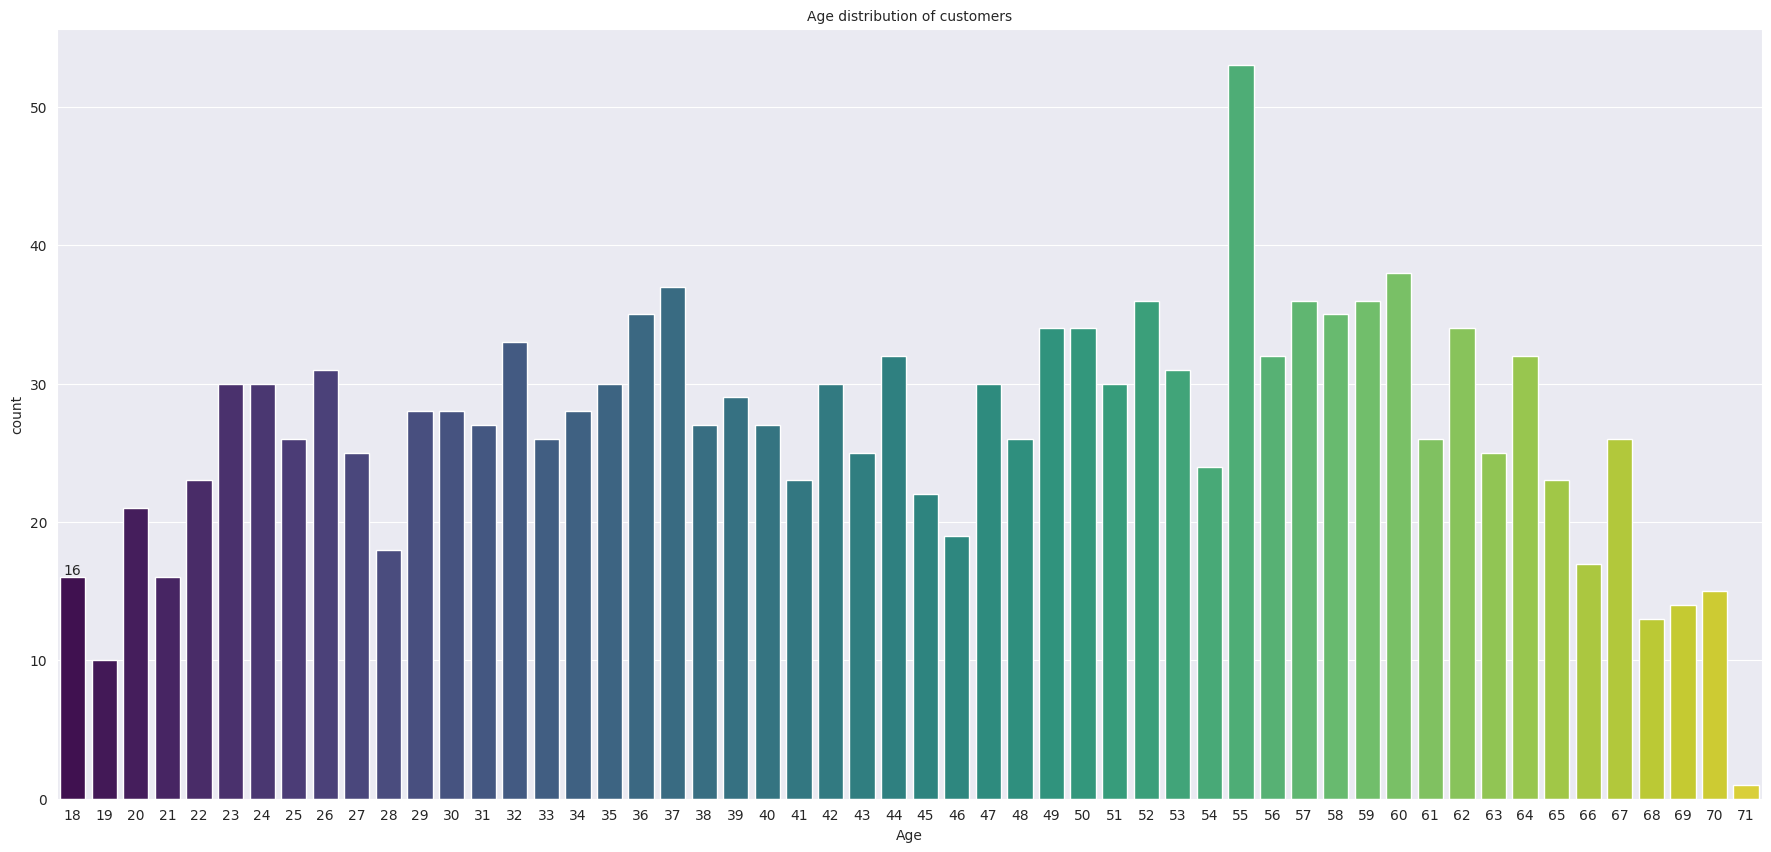

In [ ]:
labels = ['Female', 'Male']
size = gender_counts
plt.figure(figsize=(22, 10))
data = sns.countplot(x=original_df['Age'], palette='viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize=10)
plt.show()


In [ ]:
original_df = pd.read_csv('/content/mcdonalds.csv')  # Make sure original_df is loaded
original_df['Like'].head(10)

,Like
0,-3
1,+2
2,+1
3,+4
4,+2
5,+2
6,+2
7,I love it!+5
8,I hate it!-5
9,+1


#replace i olve it by +5
and i hate it by -5

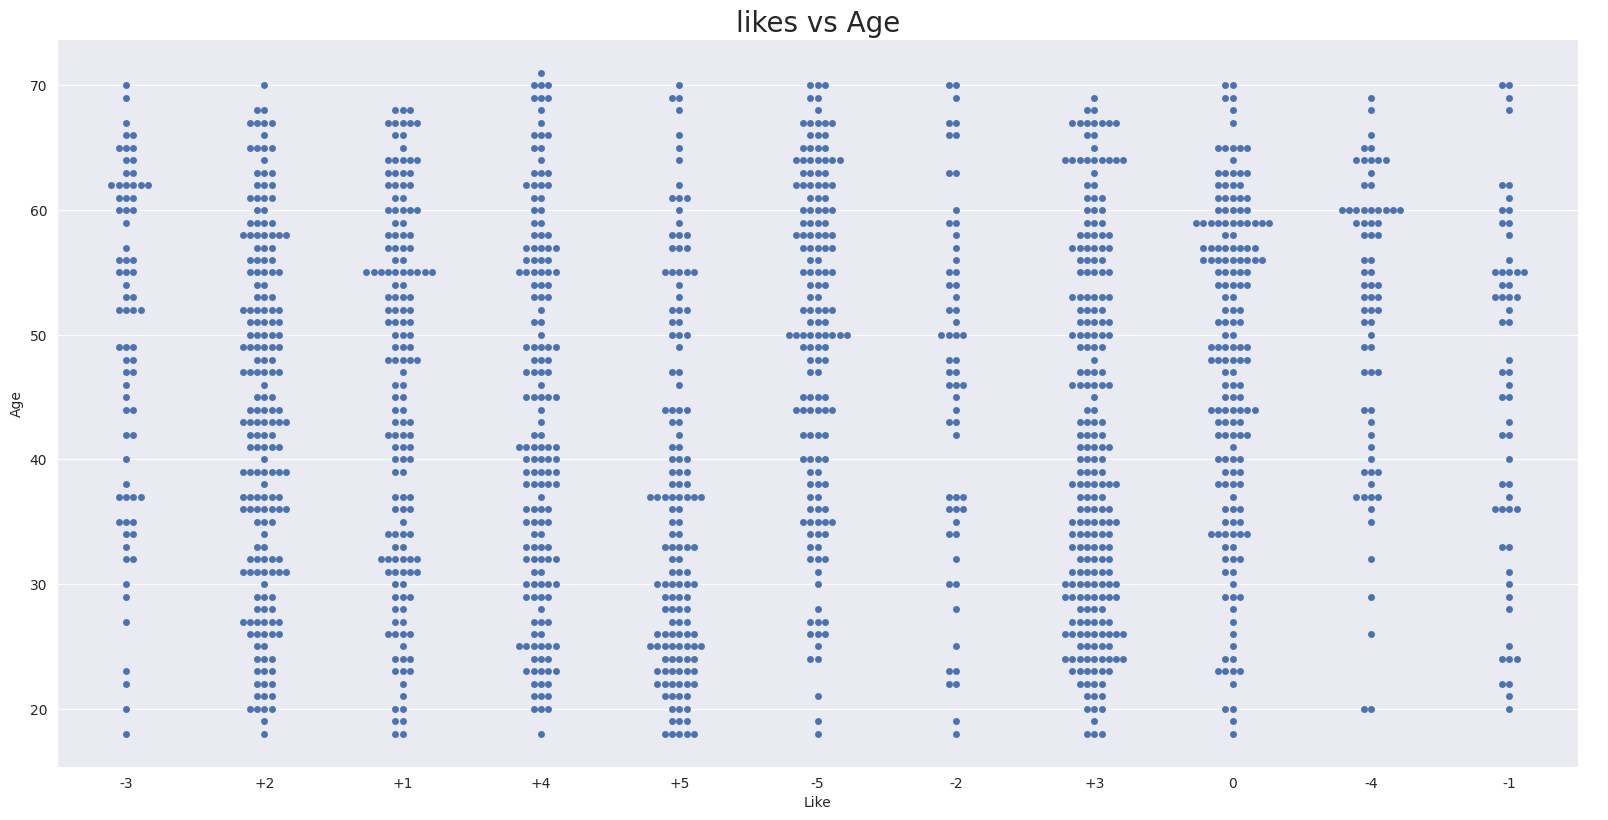

In [ ]:
original_df = pd.read_csv('/content/mcdonalds.csv')  # Load the original DataFrame
original_df['Like'] = original_df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(data=original_df, x="Like", y="Age", height=8, aspect=2,kind="swarm")
plt.title('likes vs Age', fontsize=20)
plt.show()

# Segmentation


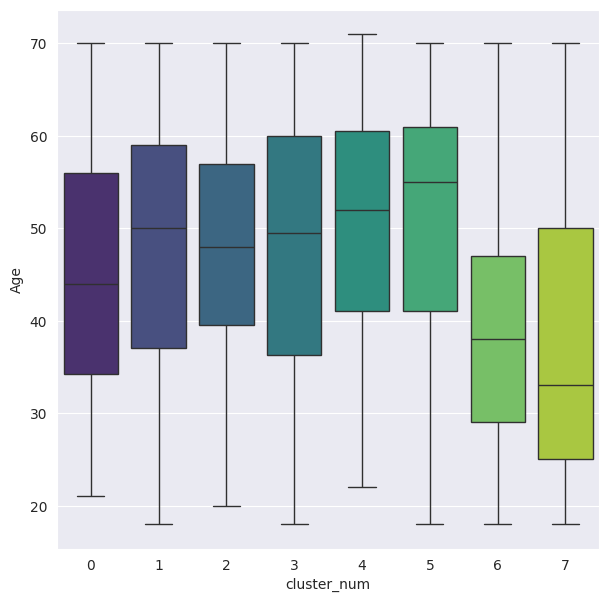

In [ ]:
sns.boxplot(x="cluster_num", y="Age", data=original_df, palette='viridis');

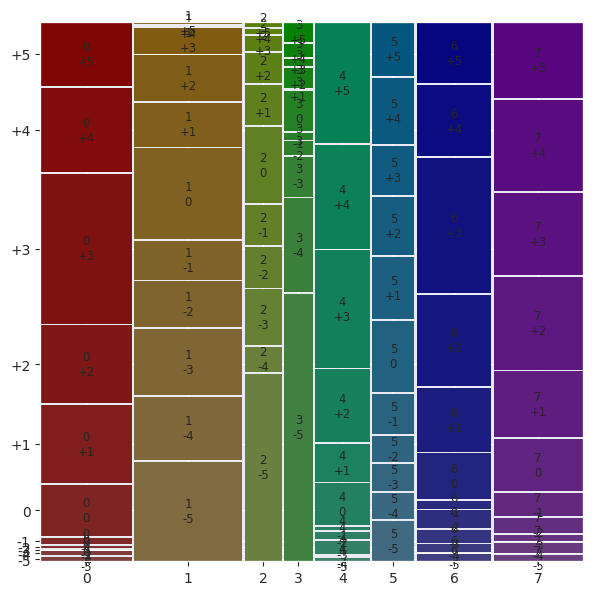

               yummy  convenient     spicy  fattening    greasy      fast  \
yummy       1.000000    0.253807  0.008742  -0.087027 -0.151853  0.106836   
convenient  0.253807    1.000000  0.028928   0.036451 -0.106948  0.243062   
spicy       0.008742    0.028928  1.000000  -0.041322  0.053932  0.020276   
fattening  -0.087027    0.036451 -0.041322   1.000000  0.319283  0.045600   
greasy     -0.151853   -0.106948  0.053932   0.319283  1.000000 -0.058212   
fast        0.106836    0.243062  0.020276   0.045600 -0.058212  1.000000   
cheap       0.105036    0.151574  0.017203  -0.026640 -0.073264  0.252133   
tasty       0.687280    0.289755  0.061154  -0.087561 -0.163536  0.145836   
expensive  -0.061727   -0.163961  0.045979   0.089134  0.147283 -0.201694   
healthy     0.247183    0.099230  0.106252  -0.338401 -0.211186  0.033596   
disgusting -0.419852   -0.340797  0.032834   0.146054  0.321879 -0.137993   

               cheap     tasty  expensive   healthy  disgusting  
yummy    

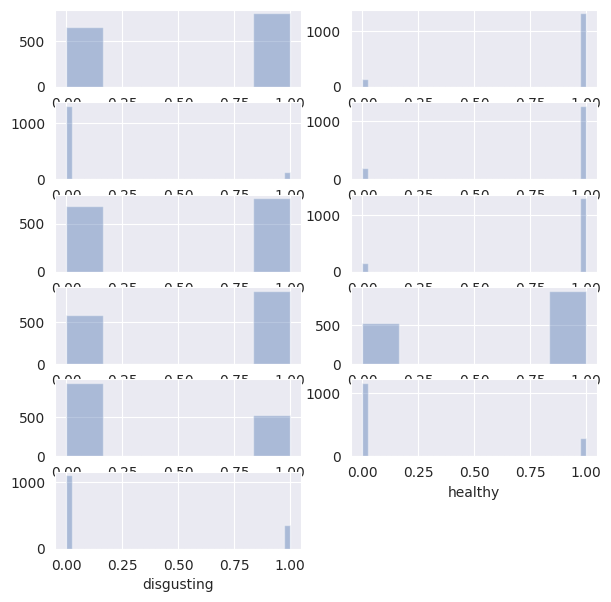

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
original_df['cluster_num'] =  kmeans.labels_
crosstab = pd.crosstab(original_df['cluster_num'], original_df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

# selecting Target Segmentation


In [ ]:
# MC D vs visit frequency
original_df['VisitFrequency'] = LabelEncoder().fit_transform(original_df['VisitFrequency'])
visit = original_df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.543307
1,1,2.744966
2,2,2.456311
3,3,2.858974
4,4,2.576159
5,5,2.572650
6,6,2.629268
7,7,2.688259


In [ ]:
Like = original_df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,2.897638
1,1,6.419463
2,2,6.864078
3,3,7.871795
4,4,3.264901
5,5,4.615385
6,6,3.146341
7,7,3.360324


In [ ]:
original_df['Gender'] = LabelEncoder().fit_transform(original_df['Gender'])
Gender = original_df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.381890
1,1,0.456376
2,2,0.533981
3,3,0.525641
4,4,0.509934
5,5,0.538462
6,6,0.512195
7,7,0.368421


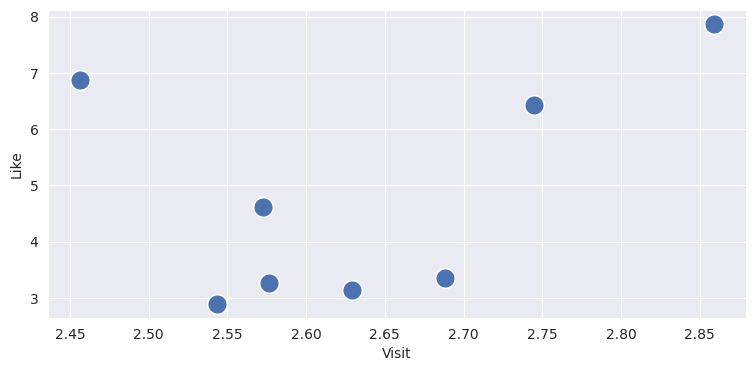

In [ ]:
plt.figure(figsize = (9,4))
merged_df = pd.merge(visit, Like, on='cluster_num')
sns.scatterplot(x = "VisitFrequency", y = "Like", data=merged_df, s=200)
plt.xlabel("Visit")
plt.ylabel("Like")
plt.show()